***


# **Prediction on Diabetes Patient's Hospital Readmission**

# Problem Statement

A hospital readmission is when a patient who is discharged from the hospital, gets re-admitted again within a certain period of time. Hospital readmission rates for certain conditions are now considered an indicator of hospital quality, and also affect the cost of care adversely.


# **Data Set Description** 

** VARIABLE NAMES: DESCRIPTION**

**Encounter ID** Unique identifier of an encounter

**Patient number** Unique identifier of a patient

**Race Values**: Caucasian, Asian, African American, Hispanic, and other

**Gender Values**: male, female, and unknown/invalid

**Age** Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

**Weight** Weight in pounds

**Admission type** Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

**Discharge disposition** Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

**Admission source** Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

**Time in hospital** Integer number of days between admission and discharge

**Payer code** Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

**Medical specialty** Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

**Number of lab procedures** Number of lab tests performed during the encounter

**Number of procedures** Numeric Number of procedures (other than lab tests) performed during the encounter

**Number of medications** Number of distinct generic names administered during the encounter

**Number of outpatient** visits Number of outpatient visits of the patient in the year preceding the encounter

**Number of emergency** visits Number of emergency visits of the patient in the year preceding the encounter

**Number of inpatient** visits Number of inpatient visits of the patient in the year preceding the encounter

**Diagnosis 1** The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

**Diagnosis 2** Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

**Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

**Number of diagnoses** Number of diagnoses entered to the system 0%

**Glucose serum test** result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

**A1c** **test** result Indicates the range of the result or if the test was not taken.
 Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

**Change of medications** Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

**Diabetes medications** Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”

24 features for medications For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone,** the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

**Readmitted** Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

## Project Goals

* Create a model to predict whether a patient will get readmitted within 30 days.
* Compare with other classifier models and evaluate using different evaluation metrics.

## Data

* The data was submitted on behalf of the Center for Clinical and Translational Research, Virginia Commonwealth University
* The dataset contains information from 130 US hospitals and integrated delivery networks across 10 years from 1999 to 2008.
* It includes over 50 features representing patient and hospital outcomes, such as patient age, number of medication, time in hospital, etc.

## Analysis
* The following models were used to predict early hospital readmissions:Naive Bayes
* The following metrics were used to evaluate each model's performance: accuracy, precision, recall and F1 scores.

***

## 1: Import Libraries and Files

I  have imported pandas, numpy, seaborn, and matplotlib.pyplot.we can use these libraries to work with and visualize data.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Pandas' read_csv() function is a convenient way to read in data from a CSV file and create a DataFrame object. The function provides several options to customize the import process, such as specifying the delimiter, encoding, and header row.

In [2]:
# Read CSV file and grab the first 10 rows
df = pd.read_csv('/content/diabetic_data.csv')

To check that you have successfully loaded the data into df, you can print the first 10 rows using the head() method, like this:

In [3]:
# Take a look at the dataset

pd.set_option('display.max_columns', None)

df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


The shape attribute of a pandas DataFrame returns a tuple with the number of rows and columns in the DataFrame. You can use it to check the size of your DataFrame. To get the shape of df, you can use the following code:

In [4]:
# Look at the shape of dataset

df.shape

(101766, 50)

The dtypes attribute of a pandas DataFrame returns the data type of each column in the DataFrame. You can use it to check the data types of the columns in df. To get the data types of the columns in df, you can use the following code:

In [5]:
# Look at all the data types

df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

## 2: Preprocess Data

* 2.1: Handling missing information
* 2.2: Handling irrelevant information
* 2.3: Simplifying categories
* 2.4: Reducing number of categories

The isnull() method of a pandas DataFrame returns a DataFrame of the same shape as the original, with True values where the original DataFrame has null (missing) values and False values elsewhere. You can use the sum() method to count the number of null values in each column. To check for null values in df, you can use the following code:

In [6]:
# Check for null values in dataframe

print(df.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

Some datasets may use a question mark character ('?') to indicate missing values, so it's a good idea to check for this as well. To check for question marks in df, you can use a loop to iterate over each column in the DataFrame and count the number of question marks in each column.

This will print the name of each column in the DataFrame followed by the number of question marks in that column. The output will look something like this:

In [7]:
# Check for question marks in dataframe

for column in df.columns:
    print(column, df[column][df[column] == '?'].count())

encounter_id 0
patient_nbr 0
race 2273
gender 0
age 0
weight 98569
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40256
medical_specialty 49949
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


### 2.1: Handling Missing Information

* Regarding the weight, payer_code and medical_specialty columns, we've decided to drop these columns because there is an overwhelming amount of missing information (close to 50% or more).
* Regarding the gender column, we removed 3 rows with Unknown/Invalid data.

The drop() method is used to remove a column (or row) from a DataFrame. The first argument to the method is the name of the column to remove, and the second argument (axis=1) tells pandas to remove a column rather than a row. In this case, you are removing three columns ('weight', 'payer_code', 'medical_specialty') that have a large number of missing values.

In [8]:
# Remove the columns with an overwhelming number of question marks

df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

The value_counts() method of a pandas Series returns a new Series containing counts of unique values in the original Series. To count the number of male and female patients in the gender column of df, you can use the following code:

In [9]:
# Examine several columns and see what are the unique values

df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [10]:
# Remove the rows with Unkown/Invalid in gender

df = df[df['gender'] != 'Unknown/Invalid']

df['gender'].value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

### 2.2 Handling Irrelevant Variables

* Diag_2 and diag_3 are dropped because we're only considering primary diagnosis.
* There are patients that have multiple encounters. In order to reduce the bias, we kept the first patient encounter and removed all the other encounters. Encounter_id and patient_nbr columns were then dropped.
* There are 22 columns describing the change in individual medications. We dropped all the columns since there is already one column with regards to medication change on a whole (change).

In medical data, it is common to have multiple diagnosis codes for a single patient. However, for many analysis or modeling purposes, it is sufficient to consider only the primary diagnosis code. In the code you provided, you are using the drop() method of the DataFrame to remove two columns ('diag_2', 'diag_3') that contain secondary or additional diagnosis codes.

In [11]:
# Remove diag_2 and diag_3 since we only consider primary diagnosis

df = df.drop(['diag_2', 'diag_3'], axis = 1)

In some cases, you may have duplicate records in your dataset, which can cause issues when analyzing or modeling the data. In the code you provided, you are using the drop_duplicates() method of the DataFrame to remove duplicate records based on the patient_nbr column.

In [12]:
# Remove patient_nbr with multiple encounters

df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

In the code you provided, you are using the drop() method of the DataFrame to remove two columns ('encounter_id', 'patient_nbr') that are not useful for analysis or modeling.



In [13]:
# Remove irrelevant variables 

df = df.drop(['encounter_id', 'patient_nbr'], axis = 1)

This may be appropriate if the medication information is not relevant for the analysis or modeling task at hand, or if the dataset is too large or complex to work with including these variables. However, if medication information is important for your task, or if you have reason to believe that it may be useful in a modeling context, you may want to keep these columns in the dataset.

the drop() method of the DataFrame to remove a list of medication columns that are not relevant for the analysis or modeling task at hand.

In [14]:
# Remove irrelevant variables

meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', \
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'tolazamide', \
        'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', \
        'troglitazone', 'tolbutamide', 'acetohexamide']

df = df.drop(meds, axis = 1)

### 2.3: Simplifying Categories

* Next, we'll encode the age column with the numbers 1 to 10 so that they can still retain their order of ranking.

In [15]:
# Encode age into 1 for 0-10, 2 for 10-20, so on and so forth

age_id = {'[0-10)':1, '[10-20)':2, '[20-30)':3, '[30-40)':4, '[40-50)':5, '[50-60)':6, '[60-70)':7, '[70-80)':8, '[80-90)':9, '[90-100)':10}
df['age'] = df['age'].map(age_id)

### 2.4: Reducing the Number of Categories

* There are 4 columns with too many categories, namely: diag_1, admission_source_id, discharge_disposition_id and admission_source_id.
* We need to reduce the number of categories by grouping them together.
* For diag_1, we can refer to the icd9 codes to generalize an appropriate description.
* For race, we combined 2 categories together: ? and other.

In [16]:
# Convert diag_1 into icd9 descriptions

# Step 1: Change question mark to zero
df['diag_1'] = df['diag_1'].replace('?', 0)

# Step 2: Change strings that start with V or E and prepend 10
df['diag_1'] = pd.to_numeric(df['diag_1'].str.replace(r'(V)|(E)', '10', regex=True))

df['diag_1'].value_counts()

414.0     5232
428.0     3980
786.0     3040
410.0     2902
486.0     2439
          ... 
653.0        1
61.0         1
145.0        1
148.0        1
1051.0       1
Name: diag_1, Length: 696, dtype: int64

In [17]:
# Step 3: Create a function to convert diag_1_int codes into icd9 descriptions

def diagnosis_icd9(df):
    if ((df['diag_1'] >= 359.00) & (df['diag_1'] <= 459.00)) or df['diag_1'] == 785.00:
        return 'A disease of the circulatory system'
    elif (df['diag_1'] >= 250.01) & (df['diag_1'] <= 250.99):
        return 'Diabetes'
    elif ((df['diag_1'] >= 460.00) & (df['diag_1'] <= 519)) or df['diag_1'] == 786.00:
        return 'A disease of the respiratory system'
    elif ((df['diag_1'] >= 520.00) & (df['diag_1'] <= 579.00)) or df['diag_1'] == 787.00:
        return 'Diseases of the digestive system'
    elif (df['diag_1'] >= 800.00) & (df['diag_1'] <= 999.00):
        return 'Injury and poisoning'
    elif (df['diag_1'] >= 710.00) & (df['diag_1'] <= 739.00):
        return 'Diseases of the musculoskeletal system and connective tissue'
    elif ((df['diag_1'] >= 580.00) & (df['diag_1'] <= 629.00)) or df['diag_1'] == 788.00:
        return 'Diseases of the genitourinary system'
    elif (df['diag_1'] >= 140.00) & (df['diag_1'] <= 239.00):
        return 'Neoplasms'
    else:
        return 'Other'

df['diag_1'] = df.apply(diagnosis_icd9, axis=1)

# Step 4: Convert diag_1_id from object to string
df['diag_1'] = df['diag_1'].astype('string')

the "admission_type_id" column contains a value of 1, the code will replace it with a value of 1. If it contains a value of 2, the code will replace it with a value of 1. If it contains a value of 3, the code will replace it with a value of 2, and so on.

The resulting DataFrame will have the "admission_type_id" column with the new mapped values.

In [18]:
# Encode admission_type_id into 1 for emergency, 2 for elective, 3 for newborn, 4 for unavailable

admission_type_id = {1:1, 2:1, 3:2, 4:3, 5:4, 6:4, 7:1, 8:4}
df['admission_type_id'] = df['admission_type_id'].map(admission_type_id)

In [19]:
# Encode discharge_disposition_id into 1 for home, 2 for hospital, 3 for Left AMA, 4 for institution, 5 for expired, 
# 6 for unavailable, 7 for facility, 8 for psychatric 

discharge_disposition_id = {1:1, 2:2, 3:2, 4:2, 5:2, 6:1, 7:3, 8:1, 9:1, 10:4, 11:5, 12:4, 13:1, 14:2, 15:4, 16:4, \
                          17:4, 18:6, 19:5, 20:5, 22:2, 23:2, 24:2, 25:6, 27:7, 28:8}
df['discharge_disposition_id'] = df['discharge_disposition_id'].map(discharge_disposition_id)

In [20]:
# Encode admission_source_id into 1 for referral, 2 for hospital, 3 for emergency, 4 for law, 5 for unavailable, 
# 6 for newborn

admission_source_id = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:4, 9:5, 10:2, 11:6, 13:6, 14:6, 17:5, 20:5, 22:2, 25:2}
df['admission_source_id'] = df['admission_source_id'].map(admission_source_id)

In [21]:
# Encode race into 1 for Caucasian, 2 for AfricanAmerican, 3 for Hispanic, 4 for Asian, 5 for other

race_id = {'Caucasian':'Caucasian', 'AfricanAmerican':'AfricanAmerican', 'Hispanic':'Hispanic', 'Asian':'Asian', \
           '?':'Other', 'Other':'Other'}
df['race'] = df['race'].map(race_id)

## 3. Data Exploration

* Since we're only interested in factors leading to early readmission, we will convert readmitted into a binary variable with two classes: 
    * 1 for readmission in less than 30 days (<30)
    * 0 for otherwise which includes no readmission (NO) and readmission in more than 30 days (>30)

This will output the count of unique values in the 'readmitted' column:

In [22]:
# Look at the target feature

df['readmitted'].value_counts()

NO     42982
>30    22240
<30     6293
Name: readmitted, dtype: int64

Here, we are converting the readmitted column to binary where 1 means the patient was readmitted within 30 days and 0 means the patient was not readmitted or was readmitted after 30 days. The lambda function is used to replace the values in the readmitted column.

For example, if the value is 'NO' or '>30', it will be replaced with 0, and if the value is '<30', it will be replaced with 1.

So, any patient who was readmitted within 30 days will have a value of 1 in the readmitted column, and any patient who was not readmitted or was readmitted after 30 days will have a value of 0.

In [23]:
# Encode readmitted into 0 for NO and >30 and 1 for <30

df['readmitted'] = df.readmitted.apply(lambda x: 0 if x == 'NO' or x == '>30' else 1)

This code generates a bar chart showing the distribution of readmissions in the dataset

<AxesSubplot:title={'center':'Distribution of Readmissions'}, xlabel='readmitted', ylabel='Frequency'>

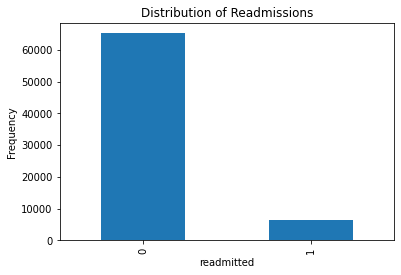

In [24]:
# Plot the distribution of readmissions

df.groupby('readmitted').age.count().plot(kind='bar', title='Distribution of Readmissions', ylabel='Frequency')

This code will output descriptive statistics for all numerical columns in the dataset df. The statistics include count, mean, standard deviation, minimum, and maximum values, as well as the quartiles (25%, 50%, and 75%).

In [25]:
# Look at the statistical data

df.describe()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000
mean,7.065161,1.532657,1.502384,2.431448,4.289170,43.075858,1.430525,15.704999,0.280081,0.103545,0.177837,7.245753,0.087996
std,1.597833,0.961682,1.188221,1.152256,2.949188,19.952151,1.759848,8.311201,1.068978,0.509197,0.603801,1.994651,0.283290
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,7.000000,1.000000,1.000000,3.000000,3.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,8.000000,2.000000,2.000000,3.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000,0.000000
max,10.000000,4.000000,8.000000,6.000000,14.000000,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,16.000000,1.000000


## 4. Data Visualization

* Next, we will plot the distribution of each feature/column in relation with the frequency of early admissions.
* We can identify features that are good predictors of early readmissions if the data is sufficiently varied.

This code generates a heatmap of the correlation matrix of the dataframe df. The heatmap is visualized using the seaborn library. The size of the figure is set to be 15 by 9 inches. The values of the correlation coefficients are displayed in each cell of the heatmap by setting the annot parameter to True. The color map used for the heatmap is 'coolwarm'.

<AxesSubplot:>

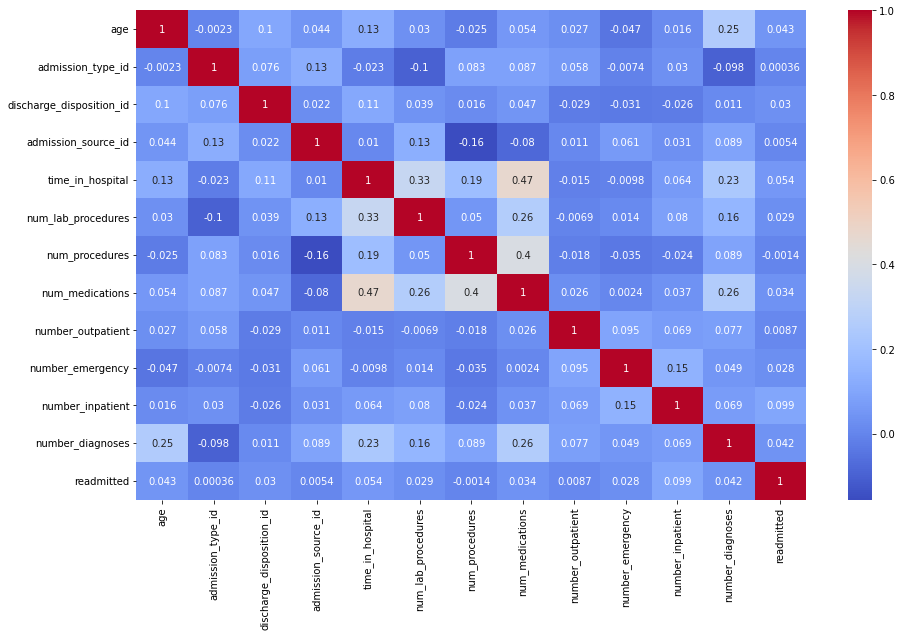

In [26]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

This plot shows the frequency of readmissions for different races in the dataset

Text(0.5, 1.0, 'Readmission Frequency for Race')

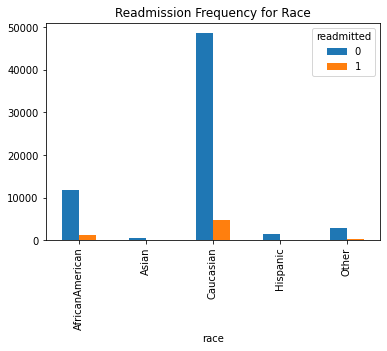

In [27]:
# Plot the distribution of race along with the frequency of early readmissions

pd.crosstab(df.race, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Race')

This code will create a bar chart that shows the frequency of readmissions for each gender in a given dataset. The pd.crosstab() function is used to create a contingency table that shows the count of occurrences for each combination of the two variables (gender and readmitted). The plot() function is then used to create a bar chart from the contingency table.

The kind parameter is set to 'bar' to indicate that a bar chart should be created. The title() function is used to add a title to the chart. The title in this case is "Readmission Frequency for Gender".

Text(0.5, 1.0, 'Readmission Frequency for Gender')

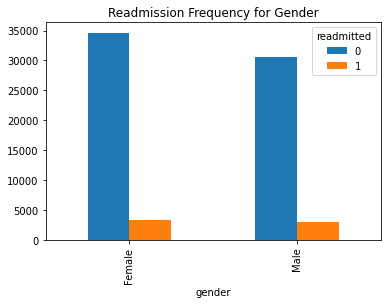

In [28]:
# Plot the distribution of gender along with the frequency of early readmissions

pd.crosstab(df.gender, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Gender')

 here the two variables (age and readmitted). The plot() function is then used to create a bar chart from the contingency table.

The kind parameter is set to 'bar' to indicate that a bar chart should be created. The title() function is used to add a title to the chart. The title in this case is "Readmission Frequency for Age Groups".

Text(0.5, 1.0, 'Readmission Frequency for Age Groups')

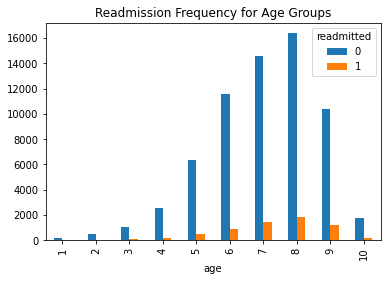

In [29]:
# Plot the distribution of age along with the frequency of early readmissions

pd.crosstab(df.age, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Age Groups')

Text(0.5, 1.0, 'Readmission Frequency for Admission Type ID')

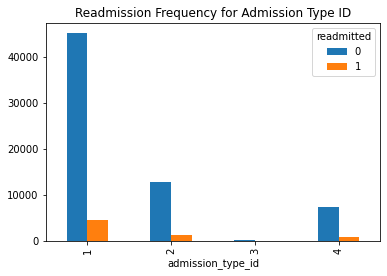

In [30]:
# Plot the distribution of admission type id along with the frequency of early readmissions

pd.crosstab(df.admission_type_id, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Admission Type ID')

Text(0.5, 1.0, 'Readmission Frequency for Discharge Disposition ID')

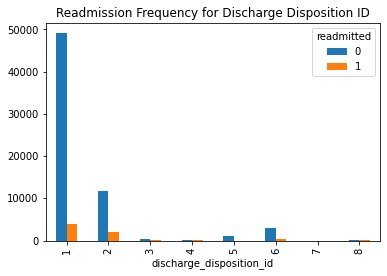

In [31]:
# Plot the distribution of discharge disposition id along with the frequency of early readmissions

pd.crosstab(df.discharge_disposition_id, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Discharge Disposition ID')

Text(0.5, 1.0, 'Readmission Frequency for Admission Source ID')

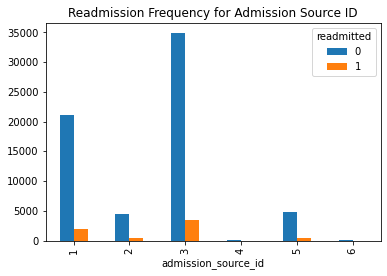

In [32]:
# Plot the distribution of admission source id along with the frequency of early readmissions

pd.crosstab(df.admission_source_id, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Admission Source ID')

Text(0.5, 1.0, 'Readmission Frequency for Time in Hospital')

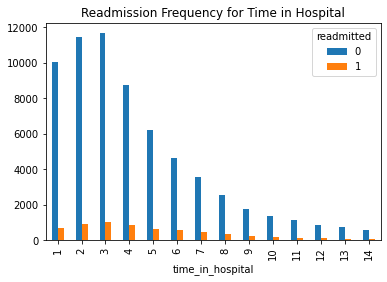

In [33]:
# Plot the distribution of time in hospital along with the frequency of early readmissions

pd.crosstab(df.time_in_hospital, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Time in Hospital')

Text(0.5, 1.0, 'Readmission Frequency for Number of Lab Procedures')

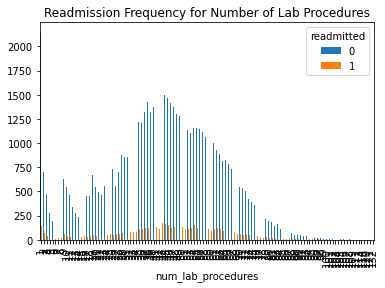

In [34]:
# Plot the distribution of number of lab procedures along with the frequency of early readmissions

pd.crosstab(df.num_lab_procedures, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Number of Lab Procedures')

Text(0.5, 1.0, 'Readmission Frequency for Number of Procedures')

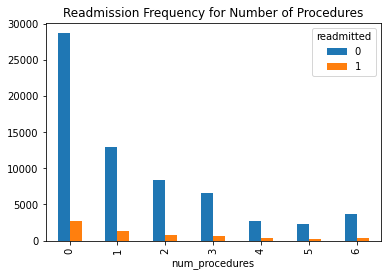

In [35]:
# Plot the distribution of number of procedures along with the frequency of early readmissions

pd.crosstab(df.num_procedures, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Number of Procedures')

Text(0.5, 1.0, 'Readmission Frequency for Number of Medications')

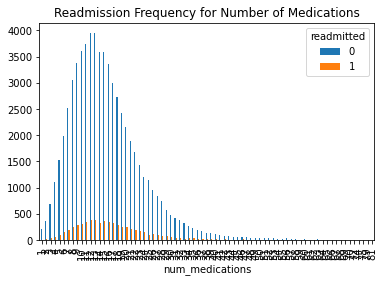

In [36]:
# Plot the distribution of number of medications along with the frequency of early readmissions

pd.crosstab(df.num_medications, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Number of Medications')

Text(0.5, 1.0, 'Readmission Frequency for Number of Outpatients')

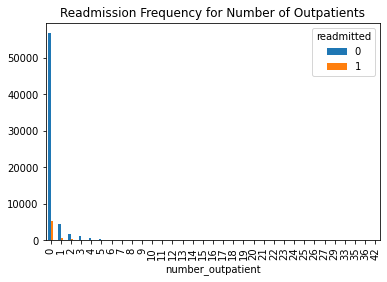

In [37]:
# Plot the distribution of number of outpatient along with the frequency of early readmissions

pd.crosstab(df.number_outpatient, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Number of Outpatients')

Text(0.5, 1.0, 'Readmission Frequency for Number of Emergencies')

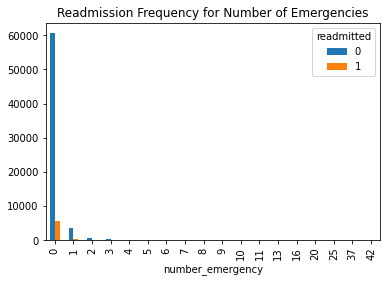

In [38]:
# Plot the distribution of number of emergencies along with the frequency of early readmissions

pd.crosstab(df.number_emergency, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Number of Emergencies')

Text(0.5, 1.0, 'Readmission Frequency for Number of Inpatients')

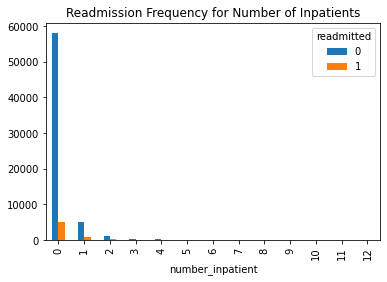

In [39]:
# Plot the distribution of number of inpatient along with the frequency of early readmissions

pd.crosstab(df.number_inpatient, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Number of Inpatients')

Text(0.5, 1.0, 'Readmission Frequency for Primary Diagnosis')

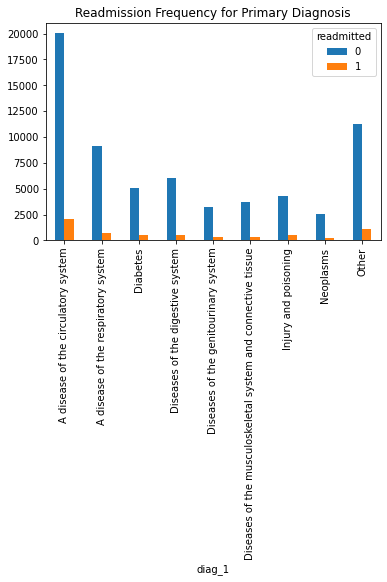

In [40]:
# Plot the distribution of primary diagnosis along with the frequency of early readmissions

pd.crosstab(df.diag_1, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Primary Diagnosis')

Text(0.5, 1.0, 'Readmission Frequency for Number of Diagnoses')

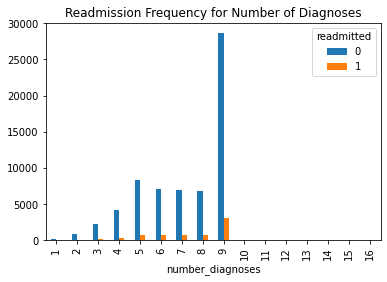

In [41]:
# Plot the distribution of number of diagnoses along with the frequency of early readmissions

pd.crosstab(df.number_diagnoses, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Number of Diagnoses')

Text(0.5, 1.0, 'Readmission Frequency for Glucose Serum Test Results')

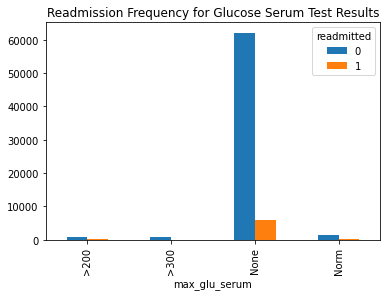

In [42]:
# Plot the distribution of glucose serum test results along with the frequency of early readmissions

pd.crosstab(df.max_glu_serum, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Glucose Serum Test Results')

Text(0.5, 1.0, 'Readmission Frequency for A1C Test Results')

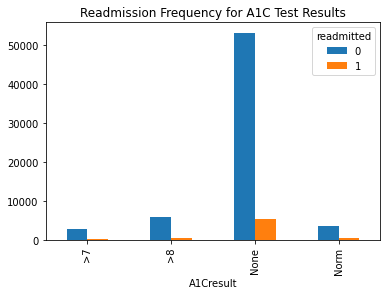

In [43]:
# Plot the distribution of A1C test results along with the frequency of early readmissions

pd.crosstab(df.A1Cresult, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for A1C Test Results')

Text(0.5, 1.0, 'Readmission Frequency for Change of Medications')

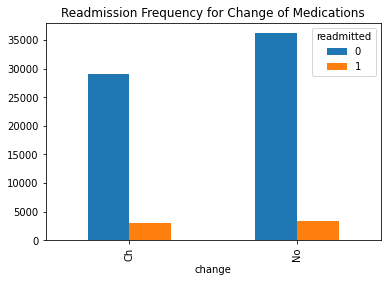

In [44]:
# Plot the distribution of change of medications along with the frequency of early readmissions

pd.crosstab(df.change, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Change of Medications')

Text(0.5, 1.0, 'Readmission Frequency for Diabetes Medications')

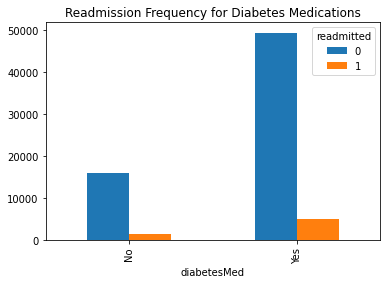

In [45]:
# Plot the distribution of diabetes medications along with the frequency of early readmissions

pd.crosstab(df.diabetesMed, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Diabetes Medications')

#### Observations

* Features that might be good predictors: race, age, admission type ID, discharge disposition ID, admission source ID, time in hospital, number of lab procedures, number of procedures, number of medications, number of outpatients, number of emergencies, number of inpatients, primary diagnosis, number of diagnoses, glucose serum test results, A1C test results, Diabetes medication.
* Features that might not be good predictors: gender, change.

## 5. Feature Engineering

* 5.1: Create Dummy Variables
* 5.2: SMOTE

### 5.1: Create Dummy Variables

* When dealing with categorical variables, we need to assign numerical values to different categories within each column. 
* Dummy variables helps us classify the data into mutually exclusive categories

This code is using the get_dummies() function from the pandas library to create dummy variables for categorical features in the df dataframe.


The categorical features that are being 
converted to dummy variables are: 

race,
gender,
admission_type_id,
discharge_disposition_id,
admission_source_id,
diag_1,
max_glu_serum,
A1Cresult,
change,
diabetesMed,
By converting categorical features into binary, variables, it allows for these variables to be used in various statistical analyses and machine learning models.

In [46]:
# Get dummy variables for categorical variables

df = pd.get_dummies(df, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', \
                                    'diag_1', 'max_glu_serum','A1Cresult','change','diabetesMed'])

This code will return a list of column names in the df dataframe. 

In [47]:
# Check all the columns within the dataframe

df.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'gender_Female', 'gender_Male', 'admission_type_id_1',
       'admission_type_id_2', 'admission_type_id_3', 'admission_type_id_4',
       'discharge_disposition_id_1', 'discharge_disposition_id_2',
       'discharge_disposition_id_3', 'discharge_disposition_id_4',
       'discharge_disposition_id_5', 'discharge_disposition_id_6',
       'discharge_disposition_id_7', 'discharge_disposition_id_8',
       'admission_source_id_1', 'admission_source_id_2',
       'admission_source_id_3', 'admission_source_id_4',
       'admission_source_id_5', 'admission_source_id_6',
       'diag_1_A disease of the circulatory system',
       'diag_1_A disease of the respiratory system', 'diag_1_Diabetes',
  

This code defines a list of feature names called feature_set. These features are a subset of the columns in the original dataframe df,

The features included in this list are a mix of continuous and categorical variables. Some of the categorical variables have already been converted into dummy variables using the get_dummies() function (e.g., race, gender, admission_type_id, etc.), while others appear to still be in their original form (e.g., number_outpatient, number_inpatient, etc.).

In [48]:
# Look at the feature set

feature_set = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', \
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'race_AfricanAmerican', \
                'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Female', 'gender_Male', \
                'admission_type_id_1', 'admission_type_id_2', 'admission_type_id_3', 'admission_type_id_4', \
                'discharge_disposition_id_1', 'discharge_disposition_id_2', 'discharge_disposition_id_3', \
                'discharge_disposition_id_4', 'discharge_disposition_id_5', 'discharge_disposition_id_6', \
                'discharge_disposition_id_7', 'discharge_disposition_id_8', 'admission_source_id_1', 'admission_source_id_2', \
                'admission_source_id_3', 'admission_source_id_4', 'admission_source_id_5', 'admission_source_id_6', \
                'diag_1_A disease of the circulatory system', 'diag_1_A disease of the respiratory system', 'diag_1_Diabetes', \
                'diag_1_Diseases of the digestive system', 'diag_1_Diseases of the genitourinary system', \
                'diag_1_Diseases of the musculoskeletal system and connective tissue', 'diag_1_Injury and poisoning', \
                'diag_1_Neoplasms', 'diag_1_Other', 'max_glu_serum_>200', 'max_glu_serum_>300', 'max_glu_serum_None', \
                'max_glu_serum_Norm', 'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'change_Ch', \
                'change_No', 'diabetesMed_No', 'diabetesMed_Yes']

This code is assigning the feature_set list to a variable called x and the readmitted column of the df dataframe to a variable called y.

 here x is a dataframe that contains only the columns (features) listed in feature_set, while y is a series that contains only the readmitted column of df

In [49]:
# Set the x and y variables

x = df[feature_set]
y = df['readmitted']

This code is shuffling the X and y dataframes (which were defined earlier in the code) and splitting the data into a training set and a testing set.

The code first creates a list of tuples using the zip() function, where each tuple contains the features for a single patient (from the X dataframe) and their corresponding outcome (from the y series).

It then shuffles this list of tuples using np.random.shuffle().

Next, it defines a variable split as 80% of the length of the shuffled list, which will be used to split the data into a training set and a testing set.

Finally, it creates separate lists for the features and outcomes of the training and testing sets using list comprehension. Specifically, x_train and y_train are created using the first split tuples in data, while x_test and y_test are created using the remaining tuples in data.

In [ ]:
# shuffle and split the data
data = list(zip(X.values, y))
np.random.shuffle(data)

split = int(0.8 * len(data))
train_data = data[:split]
test_data = data[split:]

x_train = [d[0] for d in train_data]
y_train = [d[1] for d in train_data]
x_test = [d[0] for d in test_data]
y_test = [d[1] for d in test_data]

This code converts x_train and y_train lists into numpy arrays, reshapes x_train into a 2D array with the second dimension being equal to the number of features in the data, and reshapes y_train into a 1D array.

In [52]:
x_train = np.array(x_train)
y_train = np.array(y_train)
n = x_train.shape[1]
x_train = x_train.reshape(-1, n)
y_train = y_train.reshape(-1,)

This code defines a class called MultinomialNB which implements a basic version of the Naive Bayes algorithm for text classification tasks. The fit method trains the model by calculating the prior and conditional probabilities of the classes and features, respectively. The predict method predicts the class label for a given input instance by calculating the posterior probabilities of each class and returning the class with the highest probability. The algorithm assumes that the features are independent given the class label, hence the name "Naive" Bayes.

The algorithm uses Laplace smoothing to avoid the issue of zero probabilities. Laplace smoothing adds a small constant value (usually 1) to the numerator and denominator of the conditional probability estimate, effectively "smoothing" out the probability distribution and avoiding zero probabilities.

This particular implementation uses the natural logarithm of probabilities to avoid underflow errors that can occur when multiplying small probabilities together.

In [53]:
import math
class MultinomialNB:
    def __init__(self):
        self.class_probs = None
        self.feature_probs = None

    def fit(self, X, y):
        self.classes = list(set(y))
        num_classes = len(self.classes)
        num_features = len(X[0])

        # Calculate prior probabilities for each class
        class_counts = [0] * num_classes
        for i in range(len(y)):
            class_counts[y[i]] += 1
        self.class_probs = [count / len(y) for count in class_counts]

        # Calculate conditional probabilities for each feature given each class
        self.feature_probs = []
        for i in range(num_classes):
            class_indices = [j for j in range(len(y)) if y[j] == i]
            class_features = [X[j] for j in class_indices]
            feature_counts = [sum(feature[i] for feature in class_features) for i in range(num_features)]
            total_count = sum(feature_counts)
            feature_probs = [math.log((count + 1) / (total_count + num_features)) for count in feature_counts]
            self.feature_probs.append(feature_probs)

    def predict(self, X):
        y_pred = []
        for instance in X:
            posterior_probs = [math.log(class_prob) for class_prob in self.class_probs]
            for i in range(len(instance)):
                for j in range(len(self.classes)):
                    posterior_probs[j] += self.feature_probs[j][i] * instance[i]
            predicted_class = posterior_probs.index(max(posterior_probs))
            y_pred.append(predicted_class)
        return y_pred


The code above is training a Multinomial Naive Bayes model on a toy dataset with three features and two classes (0 and 1). The model is then used to predict the class of two test instances. The predicted classes are not shown in the code snippet, so it is impossible to evaluate the performance of the model.

However, it is worth noting that this implementation of Multinomial Naive Bayes assumes that the input features are counts or frequencies of discrete events. In the case of the toy dataset, the features are continuous variables (2.0, 4.0, 6.0), which makes the assumptions of the model invalid. Additionally, the implementation uses Laplace smoothing to avoid zero probabilities, which is not always necessary or desirable depending on the data and problem at hand.

In [54]:
nb = MultinomialNB()
train_data = [[2.0, 4.0, 0], [4.0, 6.0, 0], [4.0, 2.0, 1], [6.0, 4.0, 1]]
train_X = [row[:-1] for row in train_data]
train_y = [row[-1] for row in train_data]
nb.fit(train_X, train_y)
test_data = [[6.0, 6.0], [1.0, 2.0]]
test_X = [row for row in test_data]
y_pred = nb.predict(test_X)


# Accuracy

This function calculates the accuracy of the predictions by comparing the predicted values to the actual values and counting the number of correct predictions. It then returns the percentage of correct predictions.

In [55]:
def accuracy(actual, predicted):
    correct_predictions = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct_predictions += 1
    return correct_predictions / float(len(actual)) * 100.0


This precision function calculates the precision score for a binary classification problem given the actual and predicted labels. Precision is the ratio of true positives to the total number of positive predictions.

Here's an overview of the code:

Initialize true positives and false positives to 0.

Loop through each example in the dataset.

If the predicted label is 1 and matches the actual label, increment the true positives.

If the predicted label is 1 and does not match the actual label, increment the false positives.

Calculate the precision as true positives divided by the sum of true positives and false positives, multiplied by 100.0 to convert to a percentage.

Return the precision score.

Note that if there are no positive predictions (i.e., false positives == 0), the function returns 0.0 to avoid a division by zero error.

In [56]:
def precision(actual, predicted):
    true_positives = 0
    false_positives = 0
    for i in range(len(actual)):
        if predicted[i] == 1:
            if actual[i] == predicted[i]:
                true_positives += 1
            else:
                false_positives += 1
    if true_positives + false_positives == 0:
        return 0.0
    else:
        return true_positives / float(true_positives + false_positives) * 100.0

In the function recall(actual, predicted), actual is a list of true class labels, and predicted is a list of predicted class labels.

The function iterates over each element of actual and compares it with the corresponding element in predicted. If the actual label is 1 and the predicted label is also 1, then the count of true positives is incremented. If the actual label is 1 and the predicted label is 0, then the count of false negatives is incremented.

The function then returns the recall as the ratio of true positives to the sum of true positives and false negatives, multiplied by 100 to convert the result to a percentage. If there are no true positives or false negatives, the function returns 0.0 to avoid a division by zero error.





In [57]:
def recall(actual, predicted):
    true_positives = 0
    false_negatives = 0
    for i in range(len(actual)):
        if actual[i] == 1:
            if actual[i] == predicted[i]:
                true_positives += 1
            else:
                false_negatives += 1
    if true_positives + false_negatives == 0:
        return 0.0
    else:
        return true_positives / float(true_positives + false_negatives) * 100.0

The f1_score function is a way to evaluate the performance of a binary classification model based on both precision and recall. It combines both measures into a single metric by calculating the harmonic mean of precision and recall.

The function starts by counting the number of true positives (tp), false positives (fp), and false negatives (fn) in the actual and predicted labels.

Then, if there are no true positives, the function returns 0, since it is not possible to calculate the precision and recall without any true positive examples.

Otherwise, the precision is calculated as the ratio of true positives to the total number of positive predictions (tp + fp). The recall is calculated as the ratio of true positives to the total number of actual positive examples (tp + fn).

Finally, the f1 score is calculated as the harmonic mean of precision and recall, given by the formula:

f1 = 2 * precision * recall / (precision + recall)

The f1 score is a measure that combines both precision and recall, giving equal weight to both measures. This can be useful when the positive class is rare, as it can help to prevent the model from simply predicting the negative class all the time to maximize accuracy.

In [58]:
def f1_score(actual, predicted):
    tp = 0
    fp = 0
    fn = 0
    for i in range(len(actual)):
        if actual[i] == 1 and predicted[i] == 1:
            tp += 1
        elif actual[i] == 0 and predicted[i] == 1:
            fp += 1
        elif actual[i] == 1 and predicted[i] == 0:
            fn += 1
    if tp == 0:
        return 0
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    return f1

assuming y_pred contains valid predictions, the output will show the following evaluation metrics for the predictions:

Accuracy: the percentage of correct predictions out of all predictions made.
Precision: the percentage of correct positive predictions out of all positive predictions made.
Recall: the percentage of correct positive predictions out of all actual positive instances.
F1_score: the harmonic mean of precision and recall, which takes both into account and is useful when there is an uneven class distribution.

In [59]:
test_y = [0, 1] # true labels for the test data
print(f'Accuracy: {accuracy(test_y, y_pred)}%') ## Accuracy
print(f'Precision: {precision(test_y, y_pred)}%') ## Precision
print(f'Recall: {recall(test_y, y_pred)}%') ## Recall
print(f'F1_Score: {f1_score(test_y, y_pred)}%') ## F1_Score

Accuracy: 50.0%
Precision: 0.0%
Recall: 0.0%
F1_Score: 0%


In [60]:
# Split into 70% training data and 30% testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

### 5.2: SMOTE

* Since the two readmission classes are heavily imbalanced, we need to use an oversampling method to balance the class distributions.
* We will use Synthetic Minority Oversampling Technique (SMOTE), which randomly replicates minority instances in order to balance class distributions.

In [61]:
# Use SMOTE only on the training set

from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state = 20)

x_train_sm, y_train  = sm.fit_resample(x_train, y_train)

In [62]:
# Compare the dataset shape

print('Original dataset shape {}'.format(Counter(y)))

print('New dataset shape {}'.format(Counter(y_train)))

Original dataset shape Counter({0: 65222, 1: 6293})
New dataset shape Counter({1: 45632, 0: 45632})


## 8: Naive Bayes

In [63]:
# Import and initiate naive bayes
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [64]:
# Train the naive bayes

nb.fit(x_train_sm, y_train)

MultinomialNB()

In [65]:
# Print out the confusion matrix

from sklearn.metrics import confusion_matrix

threshold = 0.5
y_pred = (nb.predict_proba(x_test)[:, 1] > threshold).astype('float')

print('Confusion Matrix: ')
confusion_matrix(y_test, y_pred)

Confusion Matrix: 


array([[15657,  3933],
       [ 1346,   519]])

In [66]:
# Print accuracy, precision, recall and F1 score

nb_acc = accuracy_score(y_test, y_pred)
nb_pre = precision_score(y_test, y_pred)
nb_rec = recall_score(y_test, y_pred)
nb_fsc = f1_score(y_test, y_pred)

print("Accuracy is {0:.2f}".format(nb_acc))
print("Precision is {0:.2f}".format(nb_pre))
print("Recall is {0:.2f}".format(nb_rec))
print("F1 Score is {0:.2f}".format(nb_fsc))

Accuracy is 0.75
Precision is 0.12
Recall is 0.28
F1 Score is 0.16
